In [1]:
# Importing required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm


In [2]:
# reading csv file
df = pd.read_csv('walmart_data.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
df.shape

(550068, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [6]:
# checking for null or nan value
df.isna().sum() # similarly df.isnull().sum() and df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [7]:
# looking like there is no num or nan value in data set.

In [8]:
df.nunique() # Count number of distinct elements

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [9]:
# so till now we have seen data related info like, info, nan, unique and so on so.

In [10]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


Found some observation:-

1. most freqeunce prod id is P00265242
2. most frequence gender is male and their age is b/w 26-35.
3. top city is B
4. mean - 9263.968713, min - 12.000000 and max - 23961.000000

In [11]:
# Now will do analysys 

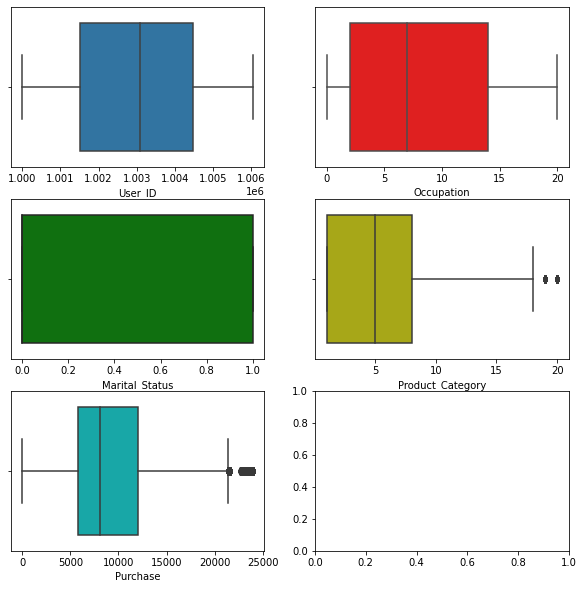

In [12]:
# Univariate for some colms

fig , axis = plt.subplots(nrows = 3 , ncols = 2 , figsize = (10,10))
sns.boxplot(data= df , x = df["User_ID"] , ax = axis[0,0])
sns.boxplot(data= df , x = df["Occupation"] , ax = axis[0,1] , color = "r")
sns.boxplot(data= df , x = df["Marital_Status"] , ax = axis[1,0] , color = "g")
sns.boxplot(data= df , x = df["Product_Category"] , ax = axis[1,1] , color = "y")
sns.boxplot(data= df , x = df["Purchase"] , ax = axis[2,0] , color = "c")
plt.show()

We can have some info from above box plot grapths like below
1. Marital_Status seems no outlier
2. Product_category has minimal outlier
3. Purchase has outlier
3. User_Id and Occupation seem do not have outlier

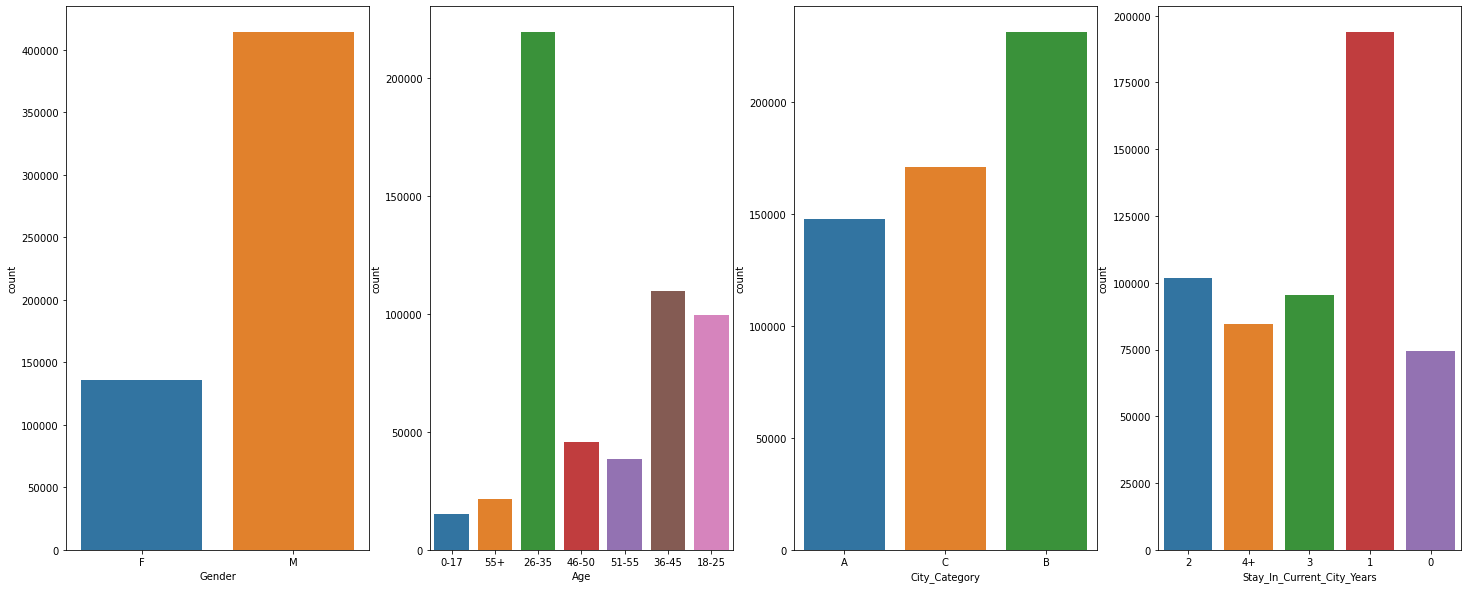

In [13]:
# Qualiative 

fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(25, 10))
sns.countplot(data = df , x = "Gender" , ax = axis[0])
sns.countplot(data = df , x = "Age" , ax = axis[1])
sns.countplot(data = df , x = "City_Category" , ax = axis[2])
sns.countplot(data = df , x = "Stay_In_Current_City_Years" , ax = axis[3])
plt.show()

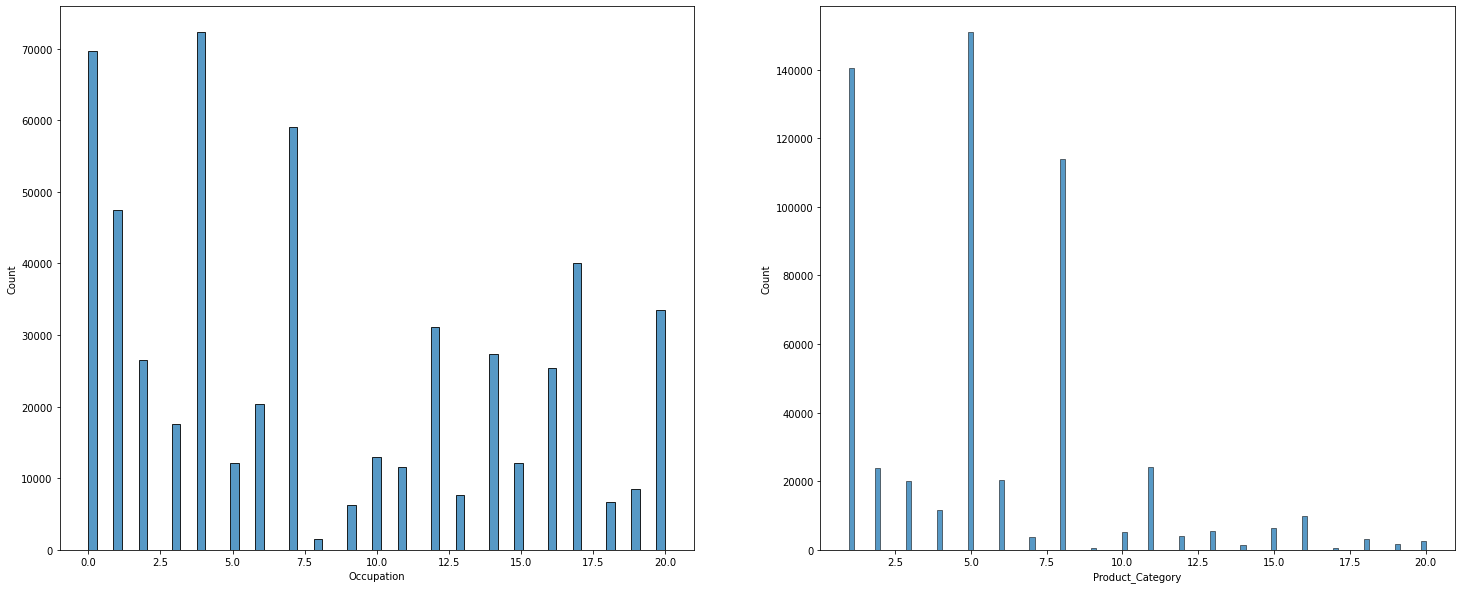

In [14]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))
sns.histplot(data = df , x = df["Occupation"] , ax = axis[0])
sns.histplot(data = df , x = df["Product_Category"] , ax = axis[1])
plt.show()

we can have some info from above graphs
1. male count is more 
2. mast active ages people 26-35
3. B city is more impectful
4. Mostly people are staying in the city 1 years

In [15]:
# Bivariate Analysys

In [16]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [17]:
df.loc[df['Gender'] == 'M'].count()

User_ID                       414259
Product_ID                    414259
Gender                        414259
Age                           414259
Occupation                    414259
City_Category                 414259
Stay_In_Current_City_Years    414259
Marital_Status                414259
Product_Category              414259
Purchase                      414259
dtype: int64

In [18]:
df.loc[df['Gender'] == 'F'].count()

User_ID                       135809
Product_ID                    135809
Gender                        135809
Age                           135809
Occupation                    135809
City_Category                 135809
Stay_In_Current_City_Years    135809
Marital_Status                135809
Product_Category              135809
Purchase                      135809
dtype: int64

In [19]:
# calculating mean

df.groupby('Gender')['Purchase'].mean()/100

Gender
F    87.345658
M    94.375260
Name: Purchase, dtype: float64

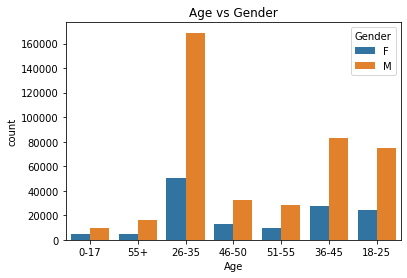

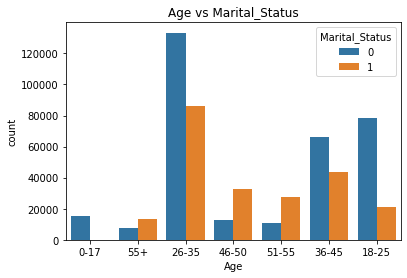

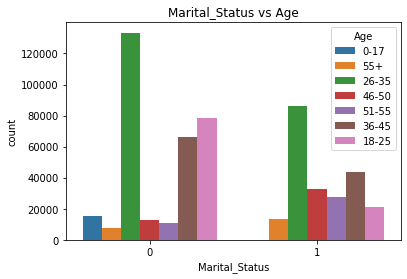

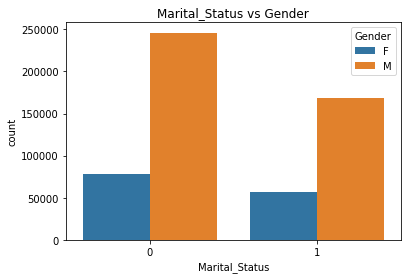

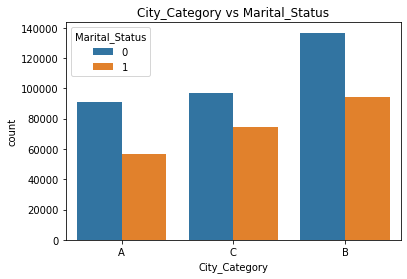

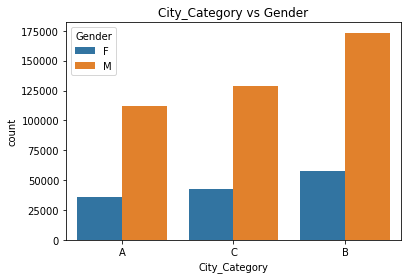

In [20]:
sns.countplot(data = df , x = "Age" , hue = "Gender").set(title = "Age vs Gender")
plt.show()

sns.countplot(data = df , x = "Age" , hue = "Marital_Status").set(title = "Age vs Marital_Status")
plt.show()

sns.countplot(data = df , x = "Marital_Status" , hue = "Age").set(title = "Marital_Status vs Age")
plt.show()

sns.countplot(data = df , x = "Marital_Status" , hue = "Gender").set(title = "Marital_Status vs Gender")
plt.show()

sns.countplot(data = df , x = "City_Category" , hue = "Marital_Status").set(title = "City_Category vs Marital_Status")
plt.show()

sns.countplot(data = df , x = "City_Category" , hue = "Gender").set(title = "City_Category vs Gender")
plt.show()



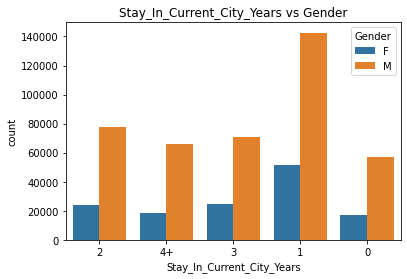

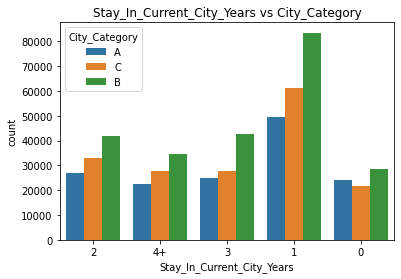

In [21]:
sns.countplot(data=df, x='Stay_In_Current_City_Years',
hue='Gender').set(title='Stay_In_Current_City_Years vs Gender')
plt.show()

sns.countplot(data=df, x='Stay_In_Current_City_Years',
hue='City_Category').set(title='Stay_In_Current_City_Years vs City_Category')
plt.show()

From above countplots we can have some observations here

1 . More number of males age between 26-35 attended the sale in Age vs Gender 

2 . More number of bachelor's age between 26-35 attended the sale in Age vs Marital_Status.

3 . More number of unmarried males attended the sale in Marital_Status vs Gender.

4 . More number of unmarried males attended the sale who lived in city B in City_Category vs Marital_Status.

5 . More number of males attented the sale who lived in city B in City_Category vs Gender.

6 . More males attended the sale who lived for 1 year in the current city in Stay_in_current_city_Years vs Gender.

7 . More number of people attended the sale age between 26-35 lived for 1 year in the same city in Stay_in_current_city_years vs Age.

8 . More number of people attended the sale who lived in city B for a year in Stay_in_current_city_Years vs City_Category.

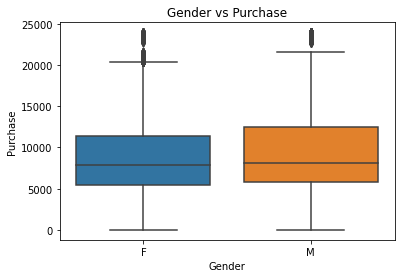

In [22]:
# wil see in boxplot.

sns.boxplot(data = df , x = "Gender" , y = "Purchase").set(title = "Gender vs Purchase")
plt.show()

M- Males made more purchase campare to F-Female

In [23]:
# similary we can get some more observation for below boxplot grapths.

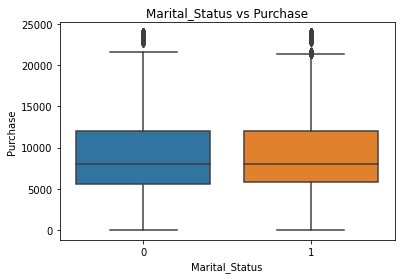

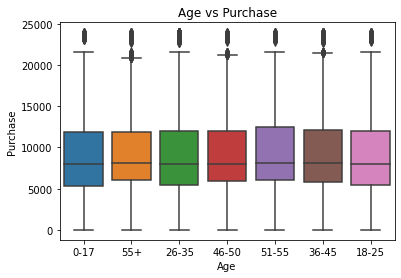

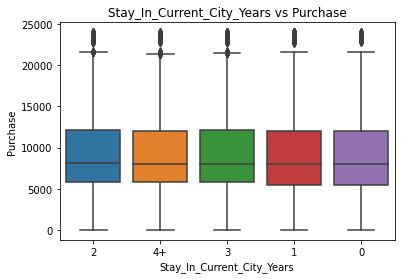

In [24]:
sns.boxplot(data = df , x = "Marital_Status" , y = "Purchase").set(title = "Marital_Status vs Purchase")
plt.show()

sns.boxplot(data = df , x = "Age" , y = "Purchase").set(title = "Age vs Purchase")
plt.show()

sns.boxplot(data = df , x = "Stay_In_Current_City_Years" , y = "Purchase").set(title = "Stay_In_Current_City_Years vs Purchase")
plt.show()

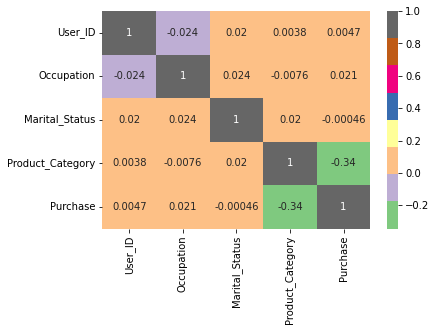

In [25]:
# now we will see multivariate Analysys using heatmap graph.
sns.heatmap(df.corr() ,cmap = "Accent" , annot= True)
plt.show()

Positive corr we can find it from above grapth if we see Martial_Status and Product_Category

Now we will try to see CLT(Central limit theoram) to compute CI(confidence internal) which can be measure by 90%, 95% or 99%

In [26]:
mean = df['Purchase'].mean()
mean

9263.968712959126

In [27]:
std = df['Purchase'].std()
std

5023.065393820582

In [28]:
l = len(df['Purchase'])
l

550068

In [29]:
# The Z-score for 90% , 95% or 99% are can be:

result = [[np.round(mean -(i*(std / np.sqrt(l))),2), np.round(mean +
(i*(std / np.sqrt(l))),2)] for i in [1.645, 1.96, 2.57]]
result  

[[9252.83, 9275.11], [9250.69, 9277.24], [9246.56, 9281.37]]

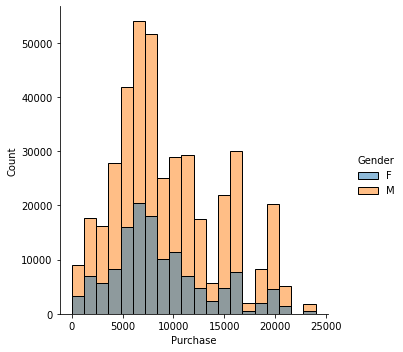

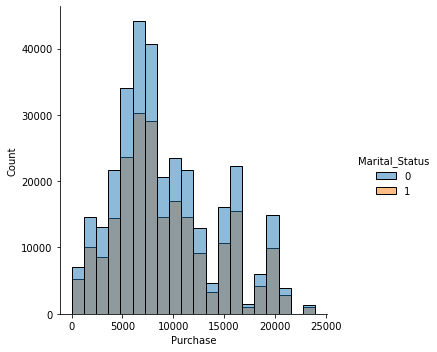

In [30]:
# CLT on Purchase done by Gender(M,F)
sns.displot(data = df , x = "Purchase" , hue = "Gender" , bins = 20)
plt.show()

# CLT on Purchase done by Marital_Status 
sns.displot(data = df , x = "Purchase" , hue = "Marital_Status" , bins = 20)
plt.show()

So we can get the infor like unmarried people purchanges more and similary Male purchansed more campare to Femal 

In [31]:
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [32]:
# taking sample data and describing and try to see some distribution based on that
df.sample(500).groupby(["Gender"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,114.0,9030.780702,4864.819508,62.0,5887.50,7827.0,11940.5,23574.0
M,386.0,9469.927461,5203.276318,37.0,5918.75,7992.0,12495.0,23633.0


In [33]:
df_sample1 = df[df['Gender'] == "M"]
df_sample1_males = df_sample1["Purchase"]
len(df_sample1_males)

414259

<AxesSubplot:>

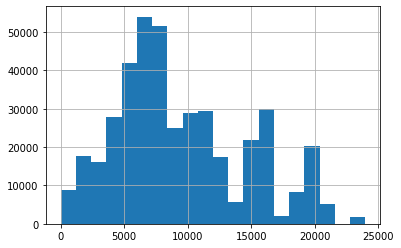

In [34]:
df_sample1_males.hist(bins = 20)

In [35]:
df_sample2 = df[df["Gender"] == "F"]
df_sample2_females = df_sample2["Purchase"]
len(df_sample2_females)

135809

<AxesSubplot:>

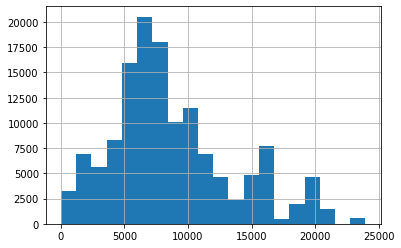

In [36]:
df_sample2_females.hist(bins = 20)

As we see the above plot is not normal distribution and if we assume it to be normal and do all calculations based on it, it might lead us to wrong conclusion and hence applying CLT to get
the sampling distribution of sample means to get a Normal Distribution out of it.
I mean to say take more sample and trials that will helps us to get result nearby expectations.

In [37]:
df['Purchase'].mean()

9263.968712959126

In [38]:
df['Purchase'].std()

5023.065393820582

In [39]:
len(df['Purchase'])

550068

<AxesSubplot:ylabel='Density'>

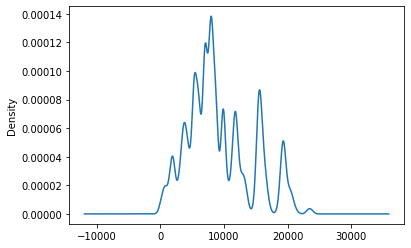

In [40]:
# ploting graph for the purchase and this seems not normal distributions, so will take some sample and 
# trails to get it normal distribution

df['Purchase'].plot(kind='kde')

In [41]:
def simulate_clt(df, sample_size=20, trials=200):
    means = []
    for i in range(trials):
        means.append(df.sample(sample_size).mean())
        pd.Series(means).plot(kind='kde')
    return pd.Series(means)

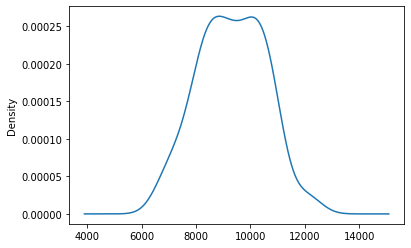

In [42]:
Trails = 100
sample = 20
mean = []
for i in range(Trails):
    mean.append(df["Purchase"].sample(sample).mean())
pd.Series(mean).plot(kind = "kde")
plt.show()

Grapth will change if we execute above both blocks code again and again

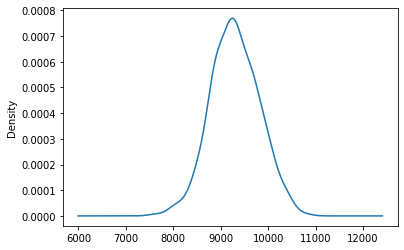

In [43]:
# with another sample and trials(big numbser) # if if increase more sise will get more occurate graph which can
Trails = 500
sample = 100
mean = []
for i in range(Trails):
 mean.append(df["Purchase"].sample(sample).mean())
pd.Series(mean).plot(kind = "kde")
plt.show()

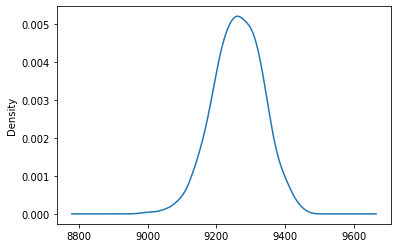

In [44]:
Trails = 500
sample = 5000
mean = []
for i in range(Trails):
 mean.append(df["Purchase"].sample(sample).mean())
pd.Series(mean).plot(kind = "kde")
plt.show()

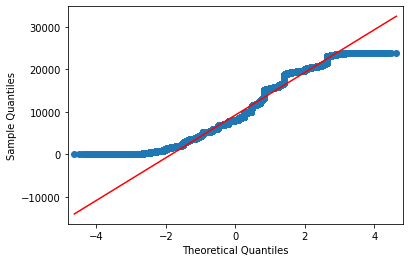

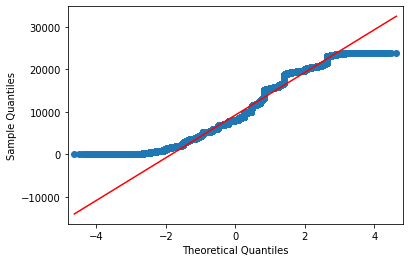

In [45]:
sm.qqplot(df["Purchase"] , dist= stats.norm , line = "s")

In [87]:
def simulate_clt(d, sample_size=20, trials=200):
    means = []
    for i in range(trials):
        means.append(d.sample(sample_size).mean())
        # print(pd.Series(means))
    pd.Series(means).plot(kind='kde')
    return pd.Series(means)

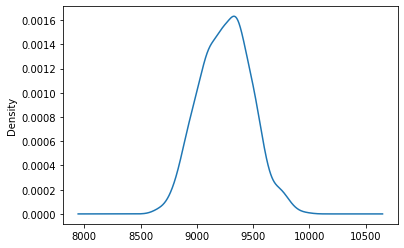

In [88]:
x = simulate_clt(df['Purchase'], sample_size=500, trials=1000)

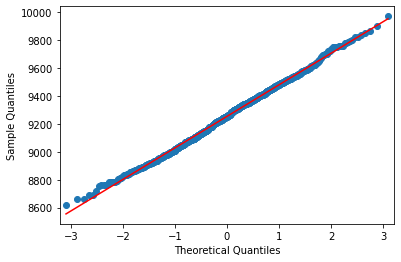

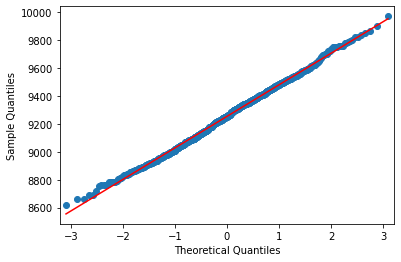

In [89]:
 sm.qqplot(x , dist = stats.norm , line = "s")

Observations:- 

1 . Earlier data points were not normally distributed.

2 . After having multiple trail and sample it tends to the normal if there is increment in the sample sizes

3 . As the sample size increases the standard deviation decreases.

In [66]:
# Now will see distribution for the males and females after taking sample and trials.

In [90]:
mean_m = df_sample1_males.mean()
mean_m

9437.526040472265

In [91]:
std_m = df_sample1_males.std()
std_m

5092.18620977797

In [92]:
m = len(df_sample1_males)
m

414259

In [93]:
mean_f = df_sample2_females.mean()
mean_f

8734.565765155476

In [94]:
std_f = df_sample2_females.std()
std_f

4767.233289291458

In [95]:
f = len(df_sample2_females)
f

135809

In [96]:
def simulate_clt(d, sample_size=20, trials=200):
    means = []
    for i in range(trials):
        means.append(d.sample(sample_size).mean())
    pd.Series(means).plot(kind='kde')
    return pd.Series(means)

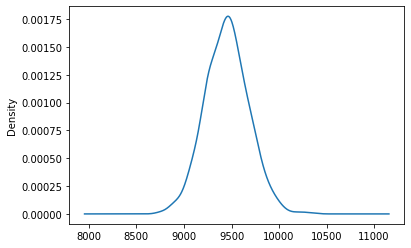

In [86]:
x = simulate_clt(df_sample1_males, sample_size=500, trials=1000)

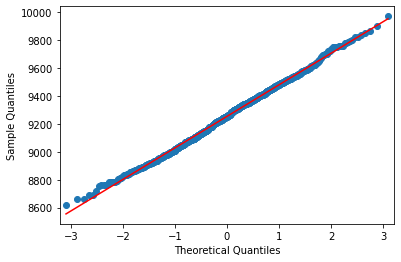

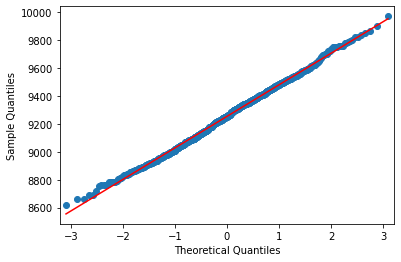

In [98]:
sm.qqplot(x , dist = stats.norm , line = "s")

In [99]:
res_M = [[np.round(mean_m -(i*(std_m / np.sqrt(m))),2),
np.round(mean_m +(i*(std_m / np.sqrt(m))),2)] for i in [1.645, 1.96,
2.57]]
res_M

[[9424.51, 9450.54], [9422.02, 9453.03], [9417.19, 9457.86]]

In [ ]:
# similarly for female

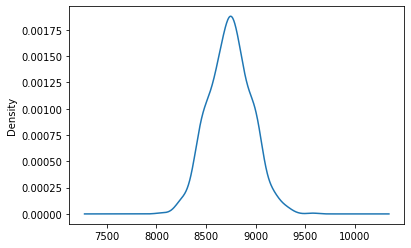

In [100]:
y = simulate_clt(df_sample2_females, sample_size=500, trials=1000)

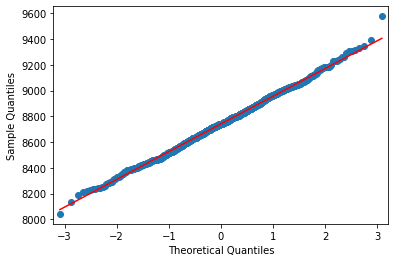

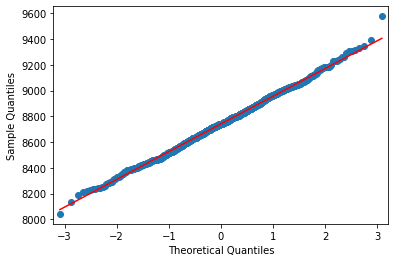

In [101]:
sm.qqplot(y , dist = stats.norm , line = "s")

Here we can have some bbservations:-

1.From above we can say for the male expenses for 90% distribution is lying in [9424.51, 9450.54] , for 95% distribution is lying in [9422.02, 9453.03] and for 99% the distrubution lying in
[9417.19, 9457.86].


2.Similary for female expenses for 90% distribution is lying in [8713.29, 8755.85] , for 95% distribution is lying in [8709.21, 8759.92] and for 99% the distrubution lying in
[8701.32, 8767.81] .

In [102]:
# CI and ditrubution of the mean of age

In [103]:
df_age_sample = df[df["Age"] == "0-17"]
df_purchase_age = df_age_sample["Purchase"]
len(df_purchase_age)

15102

In [104]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

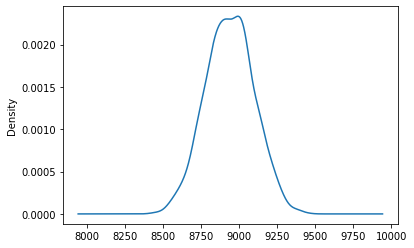

In [105]:
x = simulate_clt(df_purchase_age, sample_size=1000,
trials=1500)
plt.show()

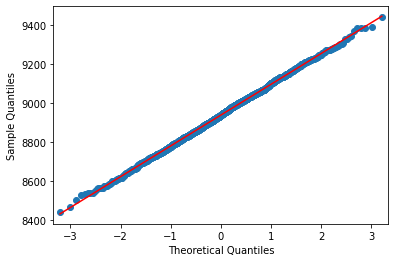

In [107]:
sm.qqplot(x , dist = stats.norm , line = "s")
plt.show()

In [108]:
df_sample1_age = df[df["Age"] == "18-25"]
df_sample1_purchase = df["Purchase"]
len(df_sample1_purchase)

550068

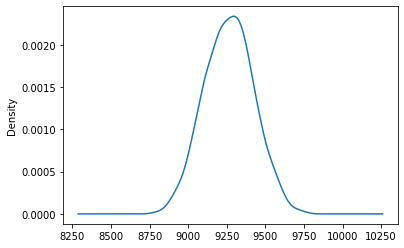

In [109]:
x = simulate_clt(df_sample1_purchase, sample_size=1000,
trials=2000)
plt.show()

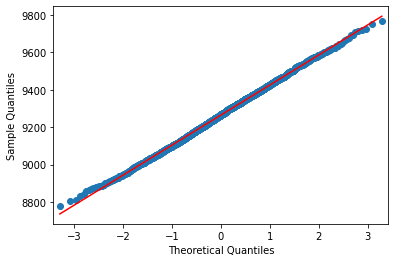

In [111]:
sm.qqplot(x , dist = stats.norm , line = "s")
plt.show()

In [112]:

df_sample2_age = df[df["Age"] == "26-35"]
df_purchase2_age = df_sample2_age["Purchase"]
len(df_purchase2_age)

219587

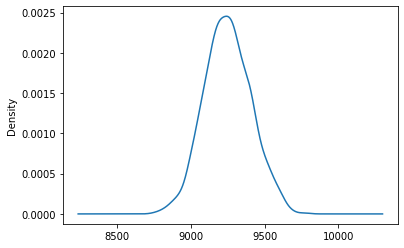

In [113]:
x = simulate_clt(df_purchase2_age, sample_size=1000,
trials= 2000)
plt.show()

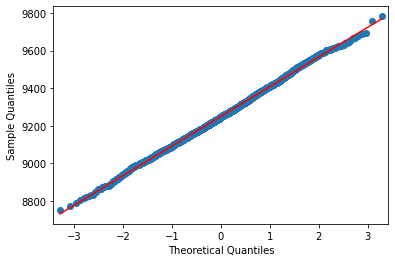

In [115]:
sm.qqplot(x , dist = stats.norm , line = "s")
plt.show()

In [116]:
df_sample3_age = df[df["Age"] == "36-45"]
df_purchase2_age = df_sample3_age["Purchase"]
len(df_purchase2_age)

110013

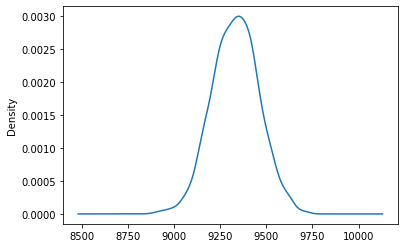

In [117]:
x = simulate_clt(df_purchase2_age , sample_size= 1500 , trials= 2000)
plt.show()

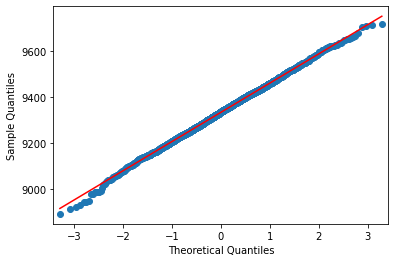

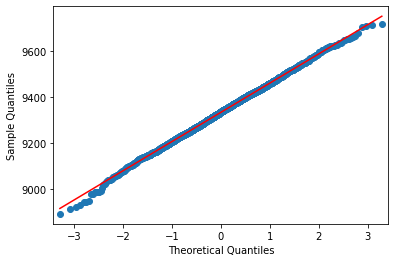

In [119]:
sm.qqplot(x , dist = stats.norm , line = "s")

In [120]:
df_sample4_age = df[df["Age"] == "55+"]
df_purchase3_age = df_sample4_age["Purchase"]
len(df_purchase3_age)

21504

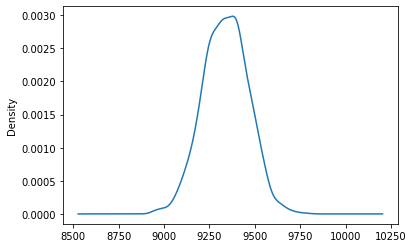

In [121]:
x = simulate_clt(df_purchase3_age , sample_size= 1500 , trials= 2000)
plt.show()

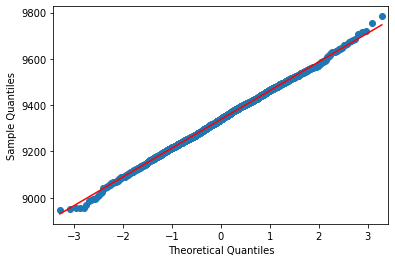

In [123]:
sm.qqplot(x , dist = stats.norm , line = "s")
plt.show()

Now I can have some recommendations based n above all the analysis

1 . about gender, so males users are more frequent than females. so that management system should give discount offers for the female category, so that they can get more no of females customer on black friday.


2 . It was observed that unmarried males are more likely to attend the sales, which can be a key feature for walmart making profits. However, these days bachleor's are into fitness and launching of
fitness products can lead to increase the buisness.

3 . The management system should give some offers on kids (0-17 years) to increase sales and events or gamng festival can be key to get more customers(basically kids).

4. Based onpopulation of city, the management can think of launch/open some more outlets.

5 . People who lived in the same city for one year have made the maximum purchase. Management should give offers or discounts to the people who live for more than 3 years in the same city.

6 . More purchase capacity is for city tier C, management should focus on tier A and tier B , as more products worth less are being purchased in tier B,so make some offers and tie ups in tier A as
well to increase Profits.